In [5]:
import tensorflow as tf
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 不显示等级2以下的提示信息

print('GPU', tf.test.is_gpu_available())

a = tf.constant(2.0)
b = tf.constant(4.0)
print(a + b)


GPU True
Tensor("add_1:0", shape=(), dtype=float32)


In [8]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

E:\lxdfood101\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\lxdfood101\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\lxdfood101\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\lxdfood101\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

Num GPUs Available:  1


In [2]:
%matplotlib inline

import time
import datetime
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
from collections import OrderedDict

from pynvml import (nvmlInit,
                     nvmlDeviceGetCount, 
                     nvmlDeviceGetHandleByIndex, 
                     nvmlDeviceGetUtilizationRates,
                     nvmlDeviceGetName)

In [3]:
def gpu_info():
    "Returns a tuple of (GPU ID, GPU Description, GPU % Utilization)"
    nvmlInit()
    deviceCount = nvmlDeviceGetCount()
    info = []
    for i in range(0, deviceCount): 
        handle = nvmlDeviceGetHandleByIndex(i) 
        util = nvmlDeviceGetUtilizationRates(handle)
        desc = nvmlDeviceGetName(handle) 
        info.append((i, desc, util.gpu)) #['GPU %i - %s' % (i, desc)] = util.gpu
    return info

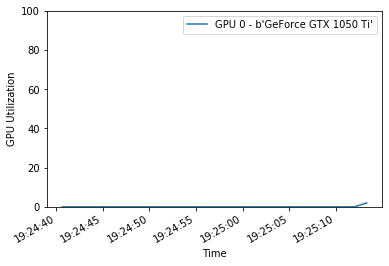

In [ ]:
utils = []
while True:
    try:
        dt = datetime.datetime.now()
        util = gpu_info()
        utils.append([dt] + [x[2] for x in util])
        # Don't plot anything on the first pass
        if len(utils) == 1:
            continue
        df = pd.DataFrame(utils, columns=['dt'] + 
                          ['GPU %i - %s' % (x[0], x[1]) for x in util]).set_index('dt')
        ax = df.plot();
        vals = ax.get_yticks();
        #ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
        ax.set_ylabel('GPU Utilization');
        ax.set_xlabel('Time');
        ax.set_ylim([0, 100])
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(1)
    except KeyboardInterrupt:
        break

In [ ]:
ax = df.plot();
vals = ax.get_yticks();
ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
ax.set_ylabel('GPU Utilization');
ax.set_xlabel('Time');